# getChironSpec

A notebook describing the code behind the `getChironSpec` python routine.

In [78]:
from pyutil.pyutil.getChironSpec import getChironSpec
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import re
import pandas as pd

In [3]:
%matplotlib inline

In [64]:
myfigsize = 14, 10
plt.rcParams['figure.figsize'] = myfigsize

In [5]:
myspec1 = getChironSpec('achi141107.1123.fits')

In [6]:
myspec1.shape

(62, 3200, 2)

(6547.14306640625, 6622.5263671875)

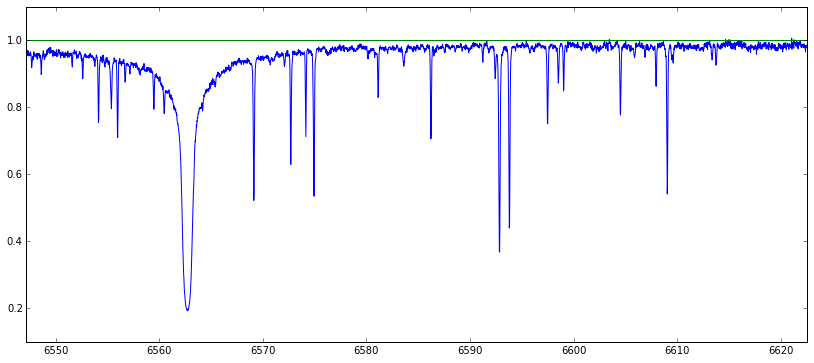

In [16]:
ord=39
fig, ax = plt.subplots()
ax.plot(myspec1[ord, :, 0], myspec1[ord, :, 1])
ax.plot([np.min(myspec1[ord, :, 0]), np.max(myspec1[ord, :, 0])], [1,1])
ax.set_xlim([np.min(myspec1[ord, :, 0]), np.max(myspec1[ord, :, 0])])

(4504.69580078125, 4556.5810546875)

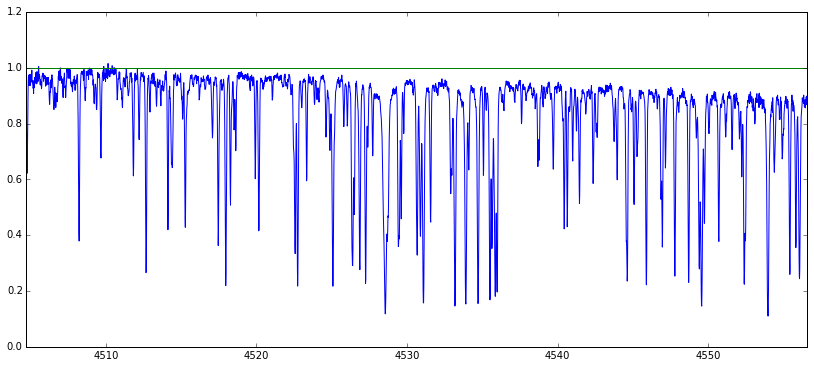

In [17]:
ord=0
fig, ax = plt.subplots()
ax.plot(myspec1[ord, :, 0], myspec1[ord, :, 1])
ax.plot([np.min(myspec1[ord, :, 0]), np.max(myspec1[ord, :, 0])], [1,1])
ax.set_xlim([np.min(myspec1[ord, :, 0]), np.max(myspec1[ord, :, 0])])

(5362.5224609375, 5424.35107421875)

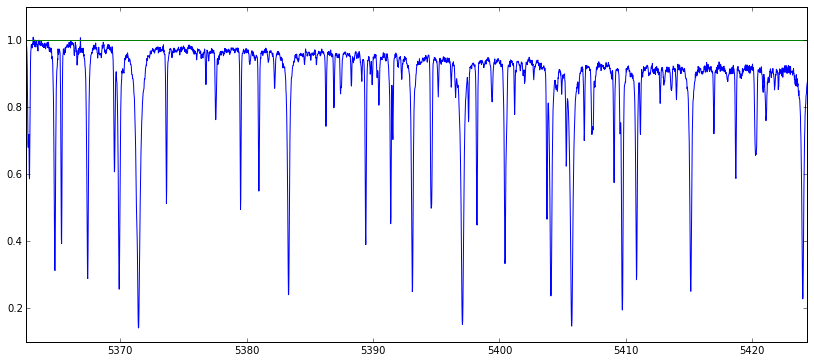

In [18]:
ord=20
fig, ax = plt.subplots()
ax.plot(myspec1[ord, :, 0], myspec1[ord, :, 1])
ax.plot([np.min(myspec1[ord, :, 0]), np.max(myspec1[ord, :, 0])], [1,1])
ax.set_xlim([np.min(myspec1[ord, :, 0]), np.max(myspec1[ord, :, 0])])

(5926.9296875, 5995.23046875)

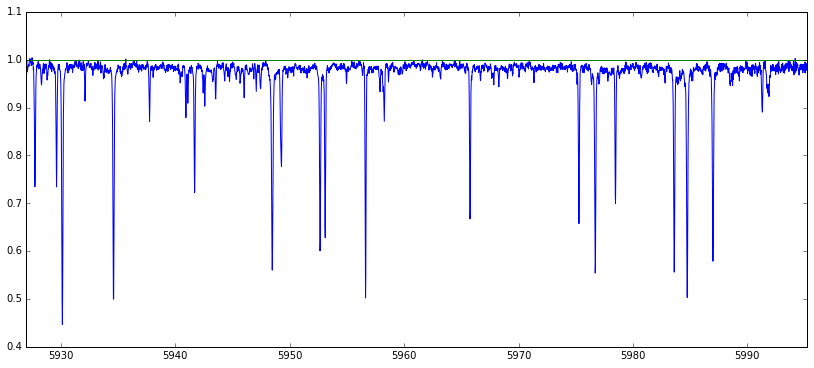

In [19]:
ord=30
fig, ax = plt.subplots()
ax.plot(myspec1[ord, :, 0], myspec1[ord, :, 1])
ax.plot([np.min(myspec1[ord, :, 0]), np.max(myspec1[ord, :, 0])], [1,1])
ax.set_xlim([np.min(myspec1[ord, :, 0]), np.max(myspec1[ord, :, 0])])

(7507.345703125, 7593.67236328125)

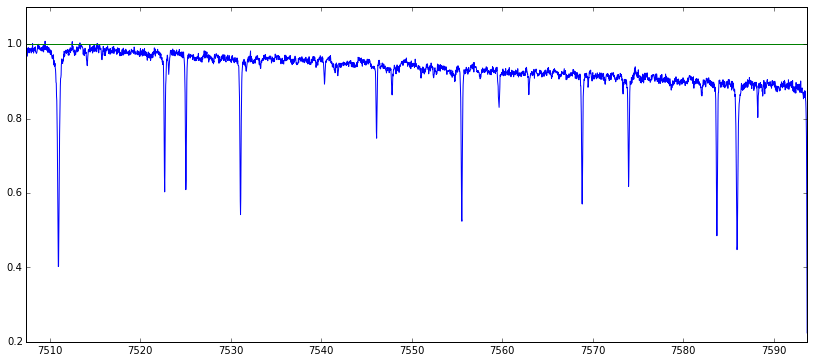

In [20]:
ord=50
fig, ax = plt.subplots()
ax.plot(myspec1[ord, :, 0], myspec1[ord, :, 1])
ax.plot([np.min(myspec1[ord, :, 0]), np.max(myspec1[ord, :, 0])], [1,1])
ax.set_xlim([np.min(myspec1[ord, :, 0]), np.max(myspec1[ord, :, 0])])

(8662.2822265625, 8761.767578125)

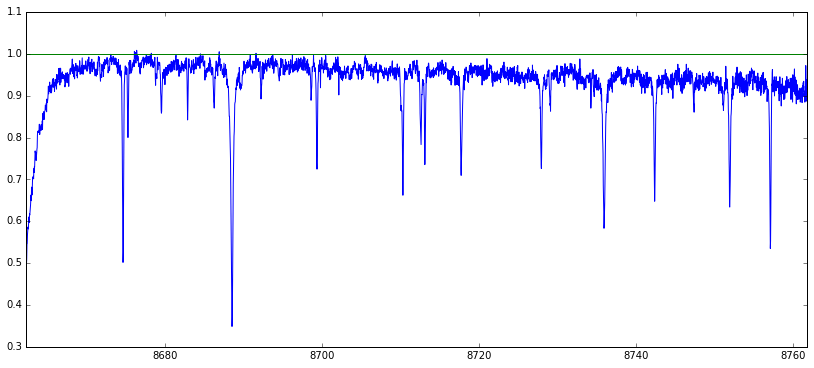

In [21]:
ord=60
fig, ax = plt.subplots()
ax.plot(myspec1[ord, :, 0], myspec1[ord, :, 1])
ax.plot([np.min(myspec1[ord, :, 0]), np.max(myspec1[ord, :, 0])], [1,1])
ax.set_xlim([np.min(myspec1[ord, :, 0]), np.max(myspec1[ord, :, 0])])

Clearly there are some problems with this... The continuum fitting isn't doing a great job. To see where it's going wrong, I'm going to restore the flat and superimpose the flat, polynomial fit to the flat, and the spectrum.

## Plotting the Narrow Exposures with Slit Flats

In [27]:
obnm = 'achi141107.1123.fits'

slit = 'slit'

In [28]:
#extract the date (yymmdd) from the obnm:
date = re.search(r'chi(\d{6})', obnm).group(1)

#extract the core of the obnm. This will make the code more
#robust, allowing people to enter the obnm with or without
#the 'a' or 'chi' or 'fits', etc.
#output obnm is in the format 'chiyymmdd.####'
obnm = re.search(r'(chi\d{6}\.\d{4})', obnm).group(1)

scihdu = fits.open('/tous/mir7/fitspec/'+date+'/a'+obnm+'.fits')
scidata = scihdu[0].data

#generate the flat filename:
flatfn = '/tous/mir7/flats/chi'+date+'.'+slit+'flat.fits'
flathdu = fits.open(flatfn)
flatdata = flathdu[0].data

#create a 2D array to store the output (wav/spec, #orders, px/order):
normspecout = np.zeros([flatdata.shape[1], flatdata.shape[2], 2])
normflatout = np.zeros([flatdata.shape[1], flatdata.shape[2], 2])

#cycle through orders
for ord in range(flatdata.shape[1]):
    #now retrieve the normalized polynomial fit to the master flat:
    normfit = flatdata[2, 61 - ord, :]/np.max(flatdata[2, 61 - ord, :])
    normflatout[ord, :, 1] = flatdata[1, 61 - ord, :]/np.max(flatdata[1, 61 - ord, :])
    normflatout[ord, :, 0] = scidata[ord, :, 0]

    #superimpose stellar spec
    normspec_init = scidata[ord, :, 1]/np.max(scidata[ord, :, 1])
    normspec = normspec_init/normfit[::-1]

    #determine the number of maximum values to
    #use in the normalization. In this case we
    #will use the top 0.5%, which corresponds
    #to 16 elements for CHIRON:
    nummax = np.int(np.ceil(0.005 * len(normspec)))
    #now sort normspec and find the mean of the
    #`nummax` highest values in the old normspec
    mnhghval = np.mean(np.sort(normspec)[-nummax:-1])
    #now renormalize by that value:
    normspecout[ord, :, 1] = normspec / mnhghval
    normspecout[ord, :, 0] = scidata[ord, :, 0]


In [33]:
flatdata.shape

(3, 62, 3200)

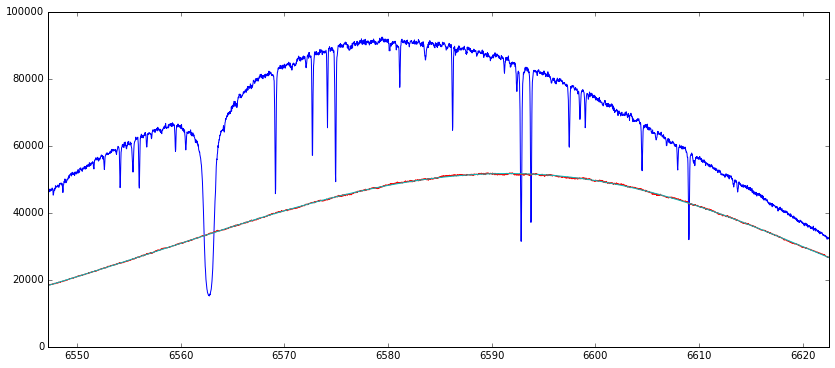

In [36]:
ord=39
fig, ax = plt.subplots()
ax.plot(scidata[ord, :, 0], scidata[ord, :, 1])
ax.plot([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])], [1,1])
ax.set_xlim([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])])

#scale_flat = 
ax.plot(scidata[ord, :, 0], flatdata[1, 61 - ord, :])
ax.plot(scidata[ord, :, 0], flatdata[2, 61 - ord, :])

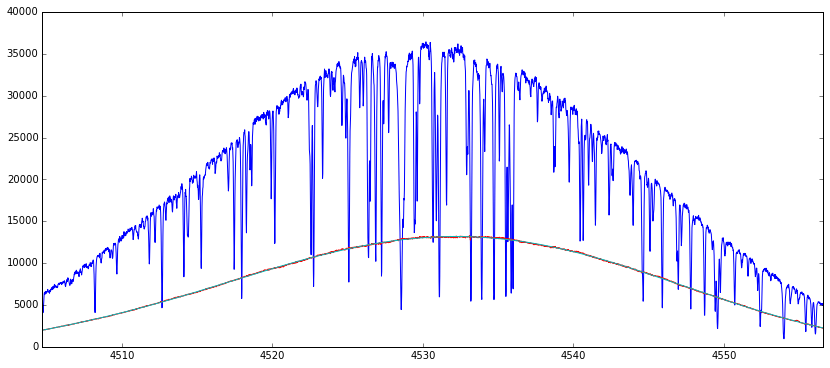

In [37]:
ord=0
fig, ax = plt.subplots()
ax.plot(scidata[ord, :, 0], scidata[ord, :, 1])
ax.plot([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])], [1,1])
ax.set_xlim([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])])

#scale_flat = 
ax.plot(scidata[ord, :, 0], flatdata[1, 61 - ord, :])
ax.plot(scidata[ord, :, 0], flatdata[2, 61 - ord, :])

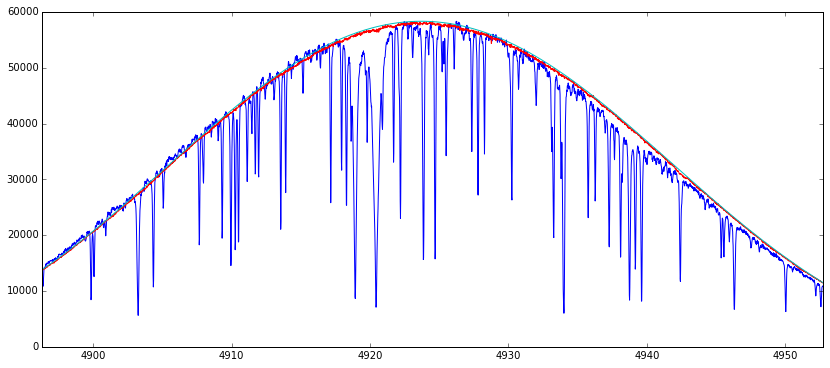

In [46]:
ord=10
fig, ax = plt.subplots()
ax.plot(scidata[ord, :, 0], scidata[ord, :, 1])
ax.plot([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])], [1,1])
ax.set_xlim([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])])

scale_flat = flatdata[1, 61 - ord, :] / np.max(flatdata[1, 61 - ord, :]) * np.max(scidata[ord, :, 1])
scale_flat_fit = flatdata[2, 61 - ord, :] / np.max(flatdata[2, 61 - ord, :]) * np.max(scidata[ord, :, 1])
ax.plot(scidata[ord, :, 0], scale_flat[::-1])
ax.plot(scidata[ord, :, 0], scale_flat_fit[::-1])

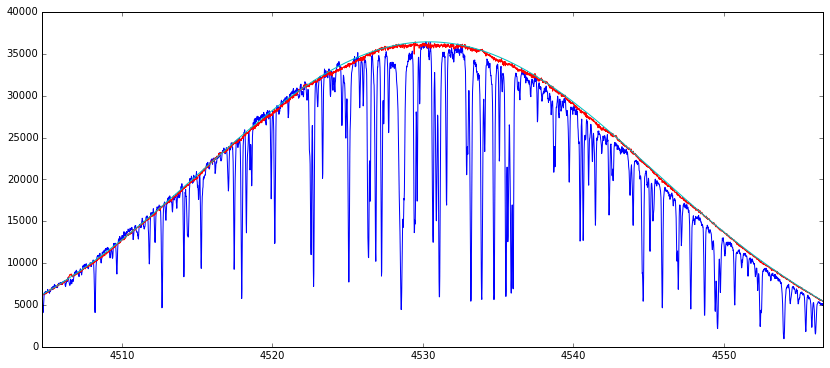

In [48]:
ord=0
fig, ax = plt.subplots()
ax.plot(scidata[ord, :, 0], scidata[ord, :, 1])
ax.plot([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])], [1,1])
ax.set_xlim([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])])

scale_flat = flatdata[1, 61 - ord, :] / np.max(flatdata[1, 61 - ord, :]) * np.max(scidata[ord, :, 1])
scale_flat_fit = flatdata[2, 61 - ord, :] / np.max(flatdata[2, 61 - ord, :]) * np.max(scidata[ord, :, 1])
ax.plot(scidata[ord, :, 0], scale_flat[::-1])
ax.plot(scidata[ord, :, 0], scale_flat_fit[::-1])

## Plotting the Narrow Exposures with Narrow Flats

In [50]:
obnm = 'achi141107.1123.fits'

slit = 'narrow'

In [55]:
#extract the date (yymmdd) from the obnm:
date = re.search(r'chi(\d{6})', obnm).group(1)

#extract the core of the obnm. This will make the code more
#robust, allowing people to enter the obnm with or without
#the 'a' or 'chi' or 'fits', etc.
#output obnm is in the format 'chiyymmdd.####'
obnm = re.search(r'(chi\d{6}\.\d{4})', obnm).group(1)

scihdu = fits.open('/tous/mir7/fitspec/'+date+'/a'+obnm+'.fits')
scidata = scihdu[0].data

#generate the flat filename:
flatfn = '/tous/mir7/flats/chi'+date+'.'+slit+'flat.fits'
flathdu = fits.open(flatfn)
flatdata = flathdu[0].data

#create a 2D array to store the output (wav/spec, #orders, px/order):
normspecout = np.zeros([flatdata.shape[1], flatdata.shape[2], 2])
normflatout = np.zeros([flatdata.shape[1], flatdata.shape[2], 2])

#cycle through orders
for ord in range(flatdata.shape[1]):
    #now retrieve the normalized polynomial fit to the master flat:
    normfit = flatdata[2, 61 - ord, :]/np.max(flatdata[2, 61 - ord, :])
    normflatout[ord, :, 1] = flatdata[1, 61 - ord, :]/np.max(flatdata[1, 61 - ord, :])
    normflatout[ord, :, 0] = scidata[ord, :, 0]

    #superimpose stellar spec
    normspec_init = scidata[ord, :, 1]/np.max(scidata[ord, :, 1])
    normspec = normspec_init/normfit[::-1]

    #determine the number of maximum values to
    #use in the normalization. In this case we
    #will use the top 0.5%, which corresponds
    #to 16 elements for CHIRON:
    nummax = np.int(np.ceil(0.005 * len(normspec)))
    #now sort normspec and find the median of the
    #`nummax` highest values in the old normspec
    mnhghval = np.median(np.sort(normspec)[-nummax:-1])
    #now renormalize by that value:
    normspecout[ord, :, 1] = normspec / mnhghval
    normspecout[ord, :, 0] = scidata[ord, :, 0]


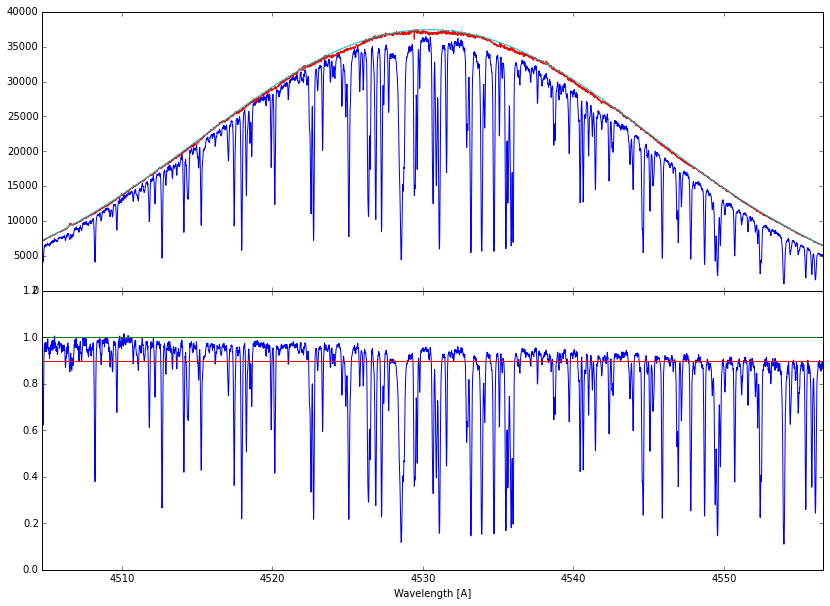

In [119]:
ord=0
fig, ax = plt.subplots(nrows=2, sharex=True)
ax[0].plot(scidata[ord, :, 0], scidata[ord, :, 1])
ax[0].plot([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])], [1,1])
ax[0].set_xlim([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])])

scale_flat = flatdata[1, 61 - ord, :] / np.max(flatdata[1, 61 - ord, :]) * np.max(scidata[ord, :, 1]) + 1e3
scale_flat_fit = flatdata[2, 61 - ord, :] / np.max(flatdata[2, 61 - ord, :]) * np.max(scidata[ord, :, 1]) + 1e3
ax[0].plot(scidata[ord, :, 0], scale_flat[::-1])
ax[0].plot(scidata[ord, :, 0], scale_flat_fit[::-1])

ax[1].plot(normspecout[ord, :, 0], normspecout[ord, :, 1])
ax[1].plot([np.min(normspecout[ord, :, 0]), np.max(normspecout[ord, :, 0])], [1, 1])
ax[1].plot([np.min(normspecout[ord, :, 0]), np.max(normspecout[ord, :, 0])], [0.9, 0.9])
ax[1].set_xlim([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])])
fig.subplots_adjust(hspace=0.001)
ax[1].set_xlabel('Wavelength [A]')
#plt.savefig('fitting_blaze_for_continuum.png', dpi=144)

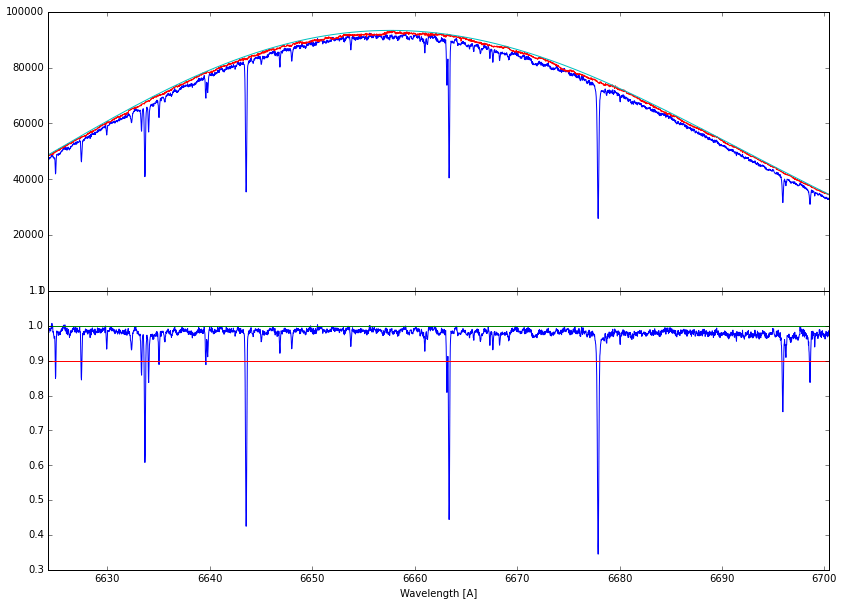

In [118]:
ord=40
fig, ax = plt.subplots(nrows=2, sharex=True)
ax[0].plot(scidata[ord, :, 0], scidata[ord, :, 1])
ax[0].plot([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])], [1,1])
ax[0].set_xlim([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])])

scale_flat = flatdata[1, 61 - ord, :] / np.max(flatdata[1, 61 - ord, :]) * np.max(scidata[ord, :, 1]) + 1e3
scale_flat_fit = flatdata[2, 61 - ord, :] / np.max(flatdata[2, 61 - ord, :]) * np.max(scidata[ord, :, 1]) + 1e3
ax[0].plot(scidata[ord, :, 0], scale_flat[::-1])
ax[0].plot(scidata[ord, :, 0], scale_flat_fit[::-1])

ax[1].plot(normspecout[ord, :, 0], normspecout[ord, :, 1])
ax[1].plot([np.min(normspecout[ord, :, 0]), np.max(normspecout[ord, :, 0])], [1, 1])
ax[1].plot([np.min(normspecout[ord, :, 0]), np.max(normspecout[ord, :, 0])], [0.9, 0.9])
ax[1].set_xlim([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])])
fig.subplots_adjust(hspace=0.001)
ax[1].set_xlabel('Wavelength [A]')
#plt.savefig('fitting_blaze_for_continuum.png', dpi=144)

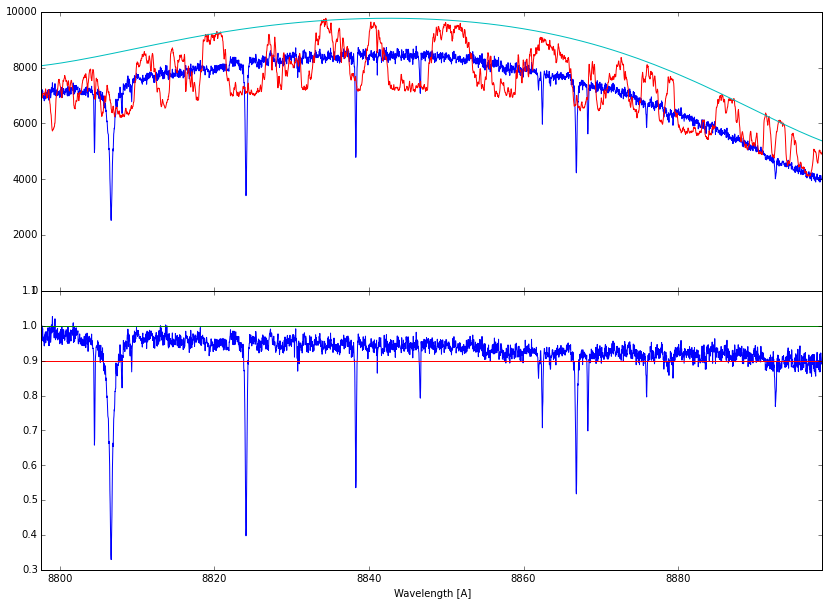

In [122]:
ord=61
fig, ax = plt.subplots(nrows=2, sharex=True)
ax[0].plot(scidata[ord, :, 0], scidata[ord, :, 1])
ax[0].plot([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])], [1,1])
ax[0].set_xlim([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])])

scale_flat = flatdata[1, 61 - ord, :] / np.max(flatdata[1, 61 - ord, :]) * np.max(scidata[ord, :, 1]) + 1e3
scale_flat_fit = flatdata[2, 61 - ord, :] / np.max(flatdata[2, 61 - ord, :]) * np.max(scidata[ord, :, 1]) + 1e3
ax[0].plot(scidata[ord, :, 0], scale_flat[::-1])
ax[0].plot(scidata[ord, :, 0], scale_flat_fit[::-1])

ax[1].plot(normspecout[ord, :, 0], normspecout[ord, :, 1])
ax[1].plot([np.min(normspecout[ord, :, 0]), np.max(normspecout[ord, :, 0])], [1, 1])
ax[1].plot([np.min(normspecout[ord, :, 0]), np.max(normspecout[ord, :, 0])], [0.9, 0.9])
ax[1].set_xlim([np.min(scidata[ord, :, 0]), np.max(scidata[ord, :, 0])])
fig.subplots_adjust(hspace=0.001)
ax[1].set_xlabel('Wavelength [A]')
#plt.savefig('fitting_blaze_for_continuum.png', dpi=144)

In [100]:
fulldf = pd.DataFrame()
for ord in range(62):
    df = pd.DataFrame(normspecout[ord, :, :], columns=['Wavelength', 'Flux'])
    df['Order'] = ord
    fulldf = fulldf.append(df, ignore_index=True)

In [101]:
len(fulldf)

198400

In [103]:
fulldf.head(3)

,Wavelength,Flux,Order
0,4504.695801,0.895931,0
1,4504.712891,0.883921,0
2,4504.729492,0.825805,0


In [104]:
fulldf.tail(3)

,Wavelength,Flux,Order
198397,8898.593750,0.895018,61
198398,8898.623047,0.899614,61
198399,8898.653320,0.910399,61


In [108]:
fulldf.to_csv('TauCetiBlazeRemoved.csv', index=False)

## Conclusion

I'm not sure what is causing the observed negative slope across the orders for the normalized spectra. Maybe it's due to a difference in spectrograph illumination between light coming from the telescope and light coming from the calibration box?